In [70]:
import glob
import geopandas as gpd
import numpy as np
from rlxutils import subplots
import matplotlib.pyplot as plt

In [3]:
basedir = "/opt/earthdata/chipsets"
dataset = 's1grd-2022'

In [117]:
files = glob.glob(f"{basedir}/*/{dataset}/*.tif")
chipsets = np.unique([file.split("/")[-3] for file in files])
len(files)

797

In [118]:
chipset = np.random.choice(chipsets)
chipset_files = [f for f in files if chipset in f]
len(chipset_files)

6

In [119]:
f"{basedir}/{chipset}.geojson"

'/opt/earthdata/chipsets/1e7877b1f2f74_partitions_aschips_27a7f10085481.geojson'

In [120]:
z = gpd.read_file(f"{basedir}/{chipset}.geojson")
z01 = z[z.group.isin(['0','1'])]
z.shape, z01.shape

((95, 4), (6, 4))

In [121]:
chip_ids = [f.split("/")[-1].split(".")[0] for f in chipset_files]
print ("number of chip files", len(chip_ids))

number of chip files 6


In [122]:
c1 = len(set(chip_ids).difference(z01.identifier.values))
c2 = len(set(z01.identifier.values).difference(chip_ids))
print ("number of existing chip files not in groups 0 or 1 ... ", c1)
print ("number chips in groups 0 or 1 with no file         ... ", c2)

number of existing chip files not in groups 0 or 1 ...  0
number chips in groups 0 or 1 with no file         ...  0


In [123]:
z01.explore()

In [124]:
chip_id = np.random.choice(chip_ids)

In [125]:
chip_file = f"{basedir}/{chipset}/{dataset}/{chip_id}.tif"
chip_file

'/opt/earthdata/chipsets/1e7877b1f2f74_partitions_aschips_27a7f10085481/s1grd-2022/14467c321fe36.tif'

In [126]:
import rasterio

In [127]:
with rasterio.open(chip_file) as r:
    x = r.read()
    d = r.descriptions
x.shape, len(d)

((16, 512, 512), 16)

In [128]:
x.dtype

dtype('uint8')

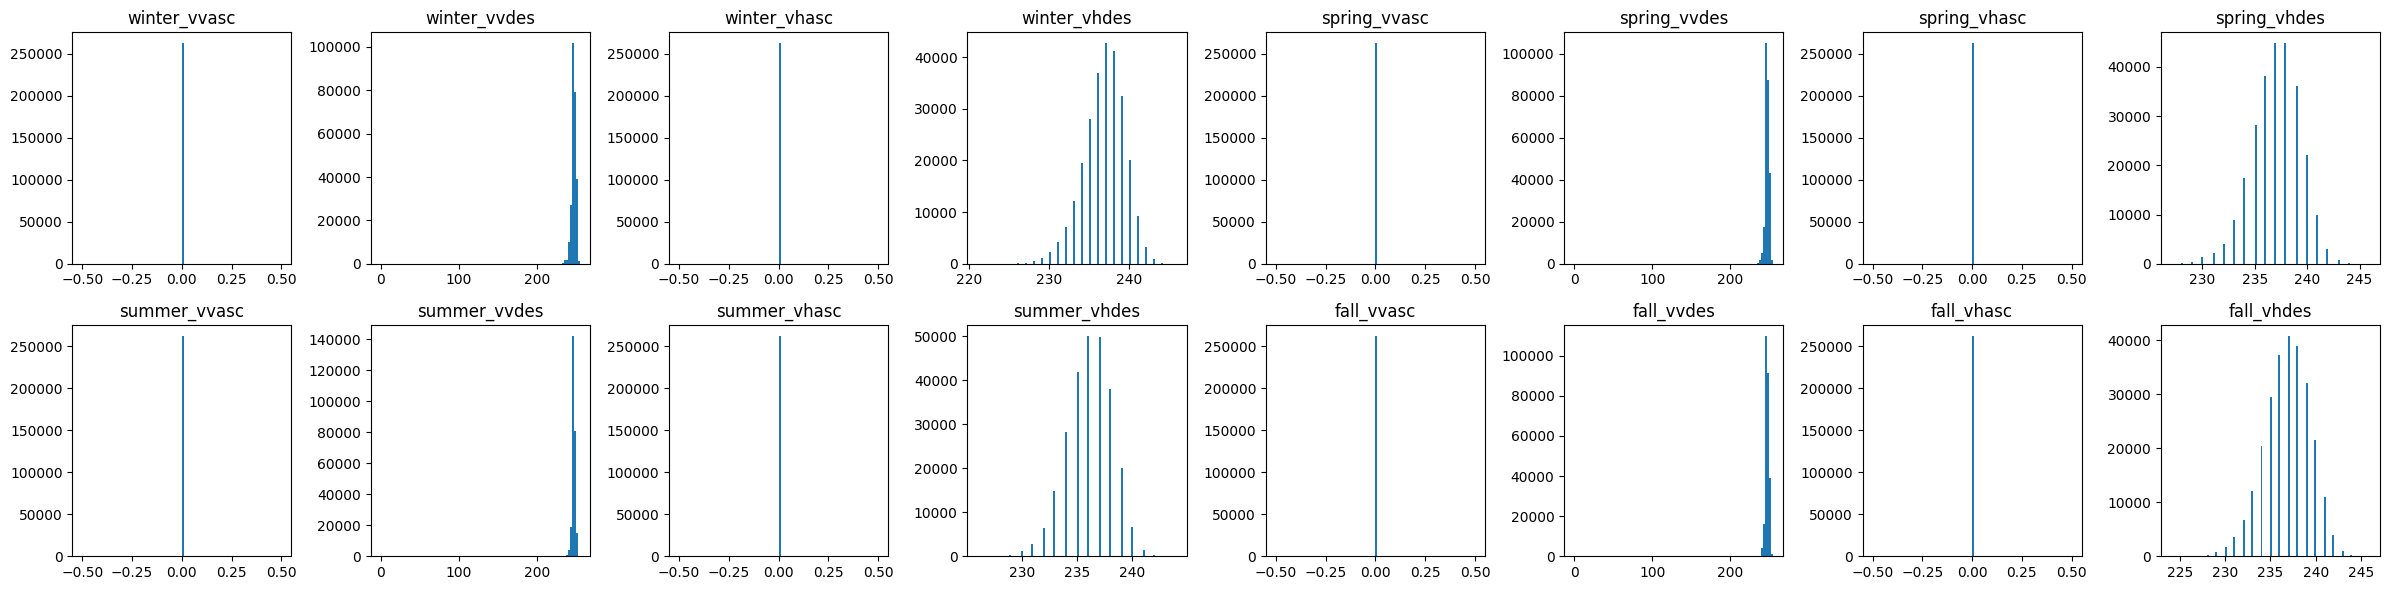

In [129]:
for ax,i in subplots(len(d), n_cols=8):
    plt.hist(x[i].flatten(), bins=100);
    plt.title(d[i])

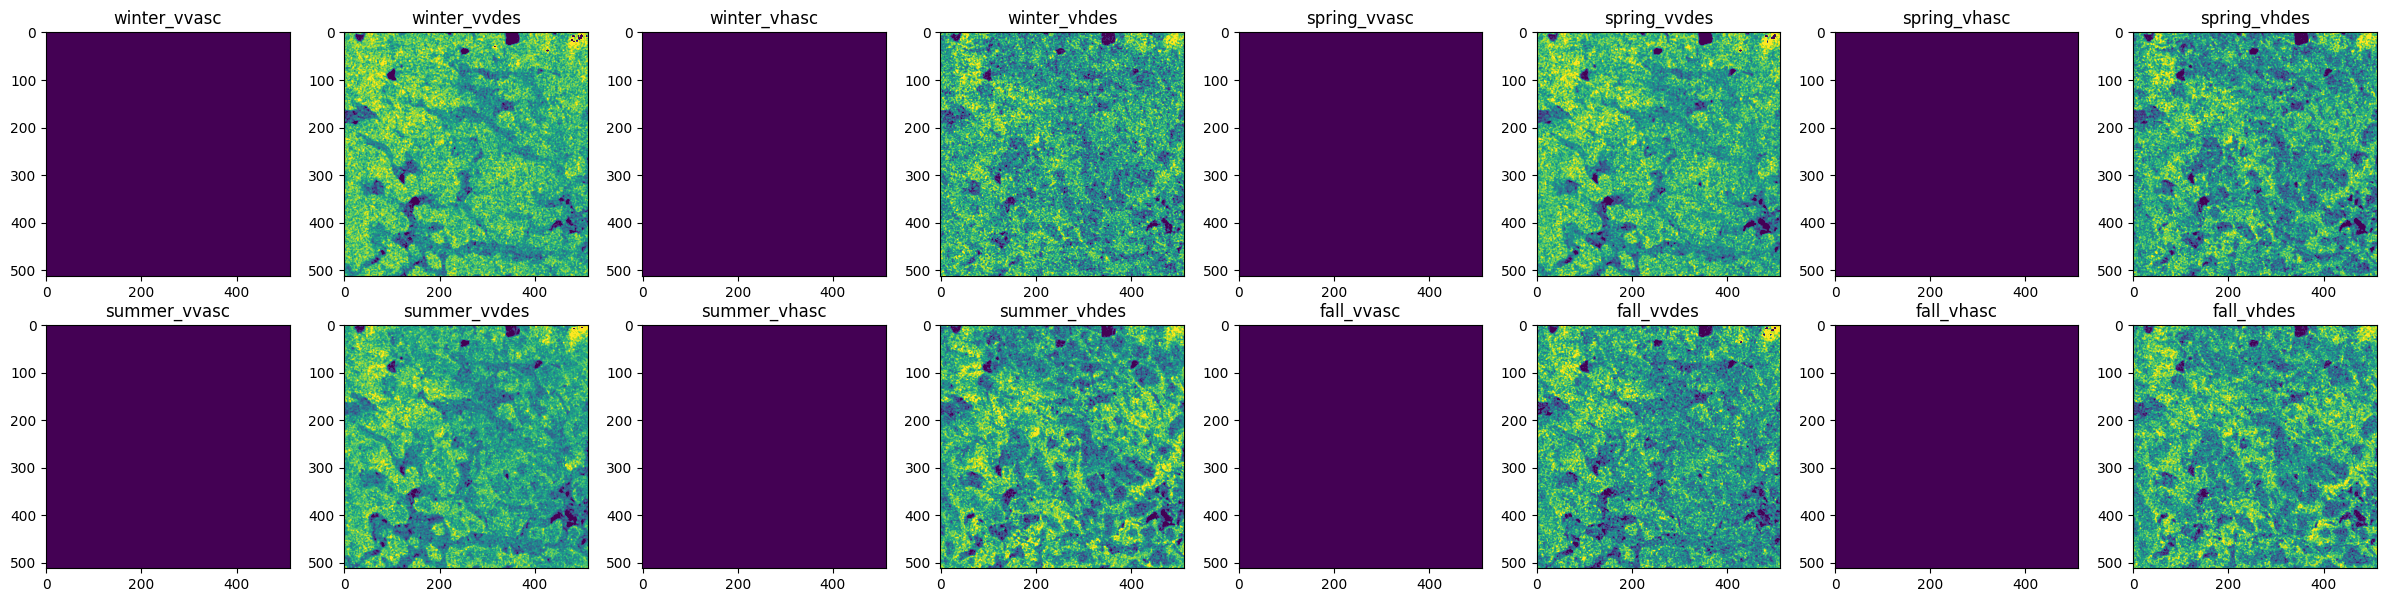

In [130]:
for ax,i in subplots(len(d), n_cols=8):
    a,b = np.percentile(x[i], (1,99))
    plt.imshow(x[i], vmin=a, vmax=b)
    plt.title(d[i])

In [131]:
z01[z01.identifier==chip_id].explore()

In [55]:
xx = x.read()

In [56]:
xx.shape

(16, 512, 512)

In [116]:
from time import sleep